<a href="https://colab.research.google.com/github/neerajviswajith/CE888/blob/main/Lab8/Lab8_TranferLearning_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Fetching Data From Repo

!wget "https://github.com/sagihaider/CE888_2021/blob/main/Lab_8/data.zip?raw=true"

--2021-05-04 18:48:57--  https://github.com/sagihaider/CE888_2021/blob/main/Lab_8/data.zip?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/sagihaider/CE888_2021/raw/main/Lab_8/data.zip [following]
--2021-05-04 18:48:57--  https://github.com/sagihaider/CE888_2021/raw/main/Lab_8/data.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_8/data.zip [following]
--2021-05-04 18:48:57--  https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_8/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting resp

In [2]:
# Unzinping Training Data

from zipfile import ZipFile
file_name = "data.zip?raw=true"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [3]:
import os

# Get all the paths
data_dir_list = os.listdir('/content/data/dogs')
#print(data_dir_list)
path, dirs, files = next(os.walk("/content/data/dogs"))
file_count = len(files)
print(file_count)

202


In [4]:
# Make new base directory
base_dir = '/content/labels'
os.mkdir(base_dir)

In [5]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [6]:
odr_human = '/content/data/Humans'
odr_cats = '/content/data/cats'
odr_dogs = '/content/data/dogs'
odr_horses = '/content/data/horses'

In [7]:
import shutil

# Spliting Human Data
fnames = ['rider-{}.jpg'.format(i) for i in range(1,160)]
for fname in fnames:
  src = os.path.join(odr_human, fname)
  dst = os.path.join(train_dir, fname)
  #print(src,dst)
  shutil.copyfile(src, dst)
    
fnames = ['rider-{}.jpg'.format(i) for i in range(160, 181)]
for fname in fnames:
  src = os.path.join(odr_human, fname)
  dst = os.path.join(validation_dir, fname)
  shutil.copyfile(src, dst)
    
fnames = ['rider-{}.jpg'.format(i) for i in range(181, 202)]
for fname in fnames:
  src = os.path.join(odr_human, fname)
  dst = os.path.join(test_dir, fname)
  shutil.copyfile(src, dst)

In [8]:
# Spliting cats Data
fnames = ['cat.{}.jpg'.format(i) for i in range(1,160)]
for fname in fnames:
  src = os.path.join(odr_cats, fname)
  dst = os.path.join(train_dir, fname)
  #print(src,dst)
  shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(160, 181)]
for fname in fnames:
  src = os.path.join(odr_cats, fname)
  dst = os.path.join(validation_dir, fname)
  shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(181, 202)]
for fname in fnames:
  src = os.path.join(odr_cats, fname)
  dst = os.path.join(test_dir, fname)
  shutil.copyfile(src, dst)

In [9]:
# Spliting dog Data
fnames = ['dog.{}.jpg'.format(i) for i in range(1,160)]
for fname in fnames:
  src = os.path.join(odr_dogs, fname)
  dst = os.path.join(train_dir, fname)
  #print(src,dst)
  shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(160, 181)]
for fname in fnames:
  src = os.path.join(odr_dogs, fname)
  dst = os.path.join(validation_dir, fname)
  shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(181, 202)]
for fname in fnames:
  src = os.path.join(odr_dogs, fname)
  dst = os.path.join(test_dir, fname)
  shutil.copyfile(src, dst)

In [10]:
# Spliting horse Data
fnames = ['horse-{}.jpg'.format(i) for i in range(1,160)]
for fname in fnames:
  src = os.path.join(odr_horses, fname)
  dst = os.path.join(train_dir, fname)
  #print(src,dst)
  shutil.copyfile(src, dst)
    
fnames = ['horse-{}.jpg'.format(i) for i in range(160, 181)]
for fname in fnames:
  src = os.path.join(odr_horses, fname)
  dst = os.path.join(validation_dir, fname)
  shutil.copyfile(src, dst)
    
fnames = ['horse-{}.jpg'.format(i) for i in range(181, 202)]
for fname in fnames:
  src = os.path.join(odr_horses, fname)
  dst = os.path.join(test_dir, fname)
  shutil.copyfile(src, dst)

In [11]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [12]:
def label_img(img):
    word_label = img.split('.')[0]
    word_label = word_label.split('-')[0]
    if word_label == 'dog': return 1
    elif word_label == 'cat': return 2
    elif word_label == 'rider': return 3
    elif word_label == 'horse': return 0

In [13]:
def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [14]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)

In [15]:
## VGG 19
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [16]:
model = VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
model.summary()

574717952/574710816 [==============================] - 4s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [17]:
last_layer = model.get_layer('fc2').output
out = Dense(4, activation='softmax', name='output')(last_layer)
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adamax',
              metrics=['acc'])

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg19_model.h5', save_best_only=True),
]

In [20]:
history = model.fit(train_X, train_y,
                    batch_size=32,
                    epochs=20, 
                    validation_data=(val_X, val_y),
                    callbacks=my_callbacks)

Epoch 1/20
20/20 [==============================] - 53s 737ms/step - loss: 1.5187 - acc: 0.3113 - val_loss: 1.0940 - val_acc: 0.5595
Epoch 2/20
20/20 [==============================] - 4s 192ms/step - loss: 1.0258 - acc: 0.6252 - val_loss: 0.8864 - val_acc: 0.6905
Epoch 3/20
20/20 [==============================] - 4s 196ms/step - loss: 0.8430 - acc: 0.7201 - val_loss: 0.8405 - val_acc: 0.6429
Epoch 4/20
20/20 [==============================] - 4s 198ms/step - loss: 0.7740 - acc: 0.7296 - val_loss: 0.7405 - val_acc: 0.7500
Epoch 5/20
20/20 [==============================] - 4s 202ms/step - loss: 0.7038 - acc: 0.7756 - val_loss: 0.7059 - val_acc: 0.7857
Epoch 6/20
20/20 [==============================] - 4s 199ms/step - loss: 0.6550 - acc: 0.8179 - val_loss: 0.7152 - val_acc: 0.7500
Epoch 7/20
20/20 [==============================] - 4s 201ms/step - loss: 0.6236 - acc: 0.8058 - val_loss: 0.6376 - val_acc: 0.7738
Epoch 8/20
20/20 [==============================] - 4s 197ms/step - loss: 0

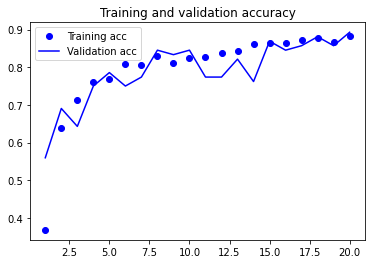

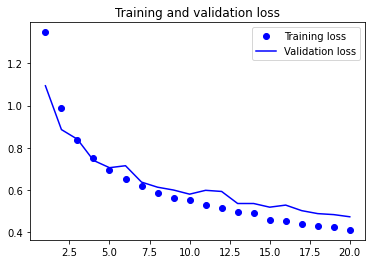

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Confusion matrix, without normalization
[[21  0  0  0]
 [ 0 18  3  0]
 [ 0  1 19  1]
 [ 1  4  0 16]]


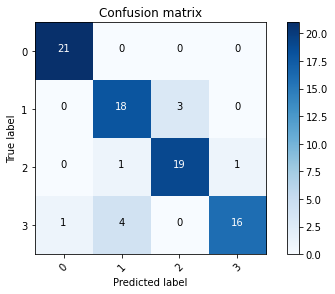

In [22]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(test_X).argmax(axis=1)
cm = confusion_matrix(test_y, p_test)
plot_confusion_matrix(cm, list(range(4)))

In [23]:
# label mapping
labels = '''Horse
Dog
Cat
Human'''.split()

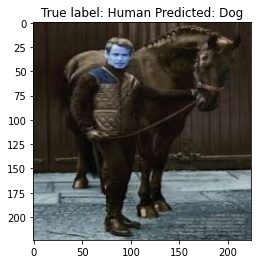

In [27]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != test_y)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(test_X[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[test_y[i]], labels[p_test[i]]));